In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("samples_v2.csv")

In [3]:
X = df.drop(columns=["true_score"])
y = df["true_score"]

In [4]:
X.head()

,score_diff,tricks_left,is_home_turn,home_num_A,home_num_10,home_num_K,home_num_Q,home_num_J,home_num_9,home_num_8,home_num_7,away_num_A,away_num_10,away_num_K,away_num_Q,away_num_J,away_num_9,away_num_8,away_num_7
0,3,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0
1,14,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
2,19,2,0,1,0,0,1,0,0,1,1,0,1,0,1,1,0,1,0
3,43,2,1,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0
4,26,3,1,1,0,0,1,0,1,1,2,0,1,1,2,1,0,1,0


In [5]:
df.groupby("is_home_turn")["true_score"].describe()

,count,mean,std,min,25%,50%,75%,max
is_home_turn,,,,,,,,
0,9326.0,59.454428,27.454034,2.0,38.0,59.0,79.0,128.0
1,11096.0,69.884913,26.975318,2.0,51.0,71.0,90.0,128.0


<Axes: >

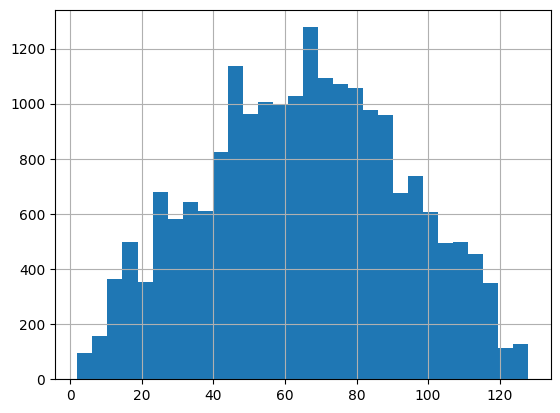

In [6]:
df["true_score"].hist(bins=30)

In [7]:
corr = df.corr(numeric_only=True)["true_score"].sort_values()
corr

away_num_A     -0.592331
home_num_7     -0.155769
home_num_9     -0.151903
home_num_J     -0.124185
home_num_Q     -0.114361
home_num_8     -0.112575
away_num_10    -0.084254
home_num_K     -0.041125
tricks_left     0.005336
away_num_K      0.060303
away_num_8      0.092290
home_num_10     0.092861
away_num_Q      0.110936
away_num_J      0.138884
away_num_9      0.147165
away_num_7      0.157159
is_home_turn    0.187665
score_diff      0.309617
home_num_A      0.612355
true_score      1.000000
Name: true_score, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

pd.Series(lr.coef_, index=X.columns).sort_values()

away_num_A     -11.655861
home_num_8      -3.383317
home_num_7      -2.663797
home_num_J      -2.511022
away_num_10     -2.220544
home_num_Q      -2.110313
home_num_9      -1.813544
home_num_K      -0.737545
tricks_left      0.322466
score_diff       0.494596
away_num_K       1.127560
away_num_8       1.852107
home_num_10      2.647822
away_num_Q       2.670774
away_num_J       2.783215
away_num_7       2.889248
away_num_9       3.198434
is_home_turn     9.151849
home_num_A      11.216648
dtype: float64

In [10]:
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 10.348098425768848
